## ** Machine Learning Project : Linear Regression Analysis **

In [ ]:
# Step 1 : import libraries
# import data manipulation library
import numpy as np
import pandas as pd

# import data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# import warning
import warnings
warnings.filterwarnings("ignore")

# import logging
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename="logs.log",
                    format="%(asctime)s - %(levelname)s - %(message)s",
                    force= True)

# import scikit-learn library
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# other important library
import time

In [ ]:
# step 2 : Import dataset using pandas function
data = pd.DataFrame({
    'Feature1':np.random.randint(0,10000,1000),
    'Feature2':np.random.randint(0,30,1000),
    'Feature3':np.random.randint(20,10000,1000),
    'Target':np.random.randint(0,100,1000)
})

In [6]:
data

,Feature1,Feature2,Feature3,Target
0,654,9,3145,46
1,8578,1,6985,11
2,8858,21,3562,0
3,4990,21,5574,32
4,2471,18,7572,31
...,...,...,...,...
995,7426,0,912,13
996,9666,5,6634,65
997,5812,28,5632,39
998,5902,7,1387,13


In [ ]:
# step 3 : checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Feature1  1000 non-null   int32
 1   Feature2  1000 non-null   int32
 2   Feature3  1000 non-null   int32
 3   Target    1000 non-null   int32
dtypes: int32(4)
memory usage: 15.8 KB


<Axes: >

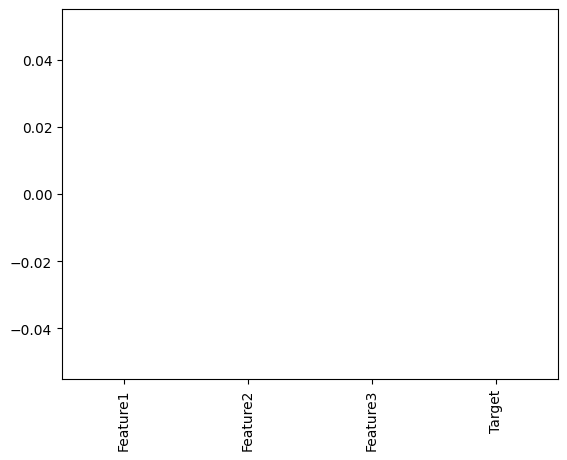

In [ ]:
# step 4 : checking null values
data.isnull().sum().plot(kind='bar')

In [ ]:
# step 5: EDA : Exploratory data analysis
from collections import OrderedDict
stats = []
for i in data.columns:
    numerical_stats = OrderedDict({
        'Features':i,
        'Count':data[i].count(),
        'Mean':data[i].mean(),
        'Median':data[i].median(),
        'Q1':data[i].quantile(0.25),
        'Q3':data[i].quantile(0.75),
        'IQR': data[i].quantile(0.75) - data[i].quantile(0.75),
        'Skewness':data[i].skew(),
        'Kurtosis':data[i].kurt()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Features,Count,Mean,Median,Q1,Q3,IQR,Skewness,Kurtosis
0,Feature1,1000,4929.382,4856.5,2490.25,7455.25,0.0,0.026957,-1.190001
1,Feature2,1000,14.585,15.0,7.00,22.00,0.0,-0.016862,-1.203056
2,Feature3,1000,4998.010,4985.0,2503.75,7478.25,0.0,0.030371,-1.180924
3,Target,1000,49.203,49.0,24.00,76.00,0.0,0.004601,-1.247382


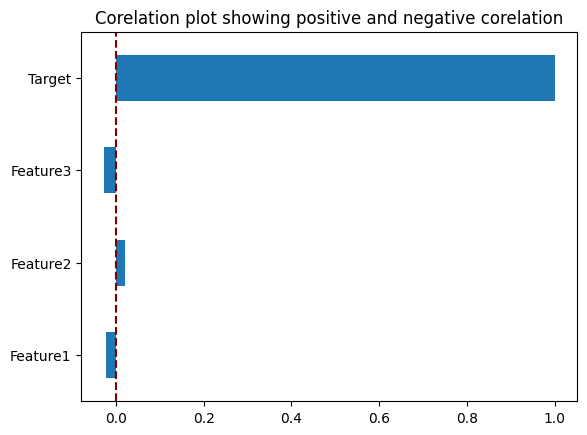

In [ ]:
# checking corelation of features w.r.t. target column
data.corr()['Target'].plot(kind='barh')
plt.axvline(0,linestyle='--',color = 'maroon')
plt.title('Corelation plot showing positive and negative corelation')
plt.show()

In [ ]:
# step 6 : Model building
start = time.time()

In [19]:
end =time.time()

In [20]:
time = end - start
time

2.114781618118286